In [1]:
import numpy as np

In [6]:
A = np.array([[1, 2], [2,4.0001]])

In [7]:
import numpy.linalg as la

In [9]:
la.det(A)

np.float64(9.999999999976704e-05)

In [11]:
la.inv(A)

array([[ 40001.00000009, -20000.00000005],
       [-20000.00000005,  10000.00000002]])

In [12]:
la.cond(A)

np.float64(250008.00009210614)

In [13]:
B = np.ones((2,2))
C = np.eye(3)

In [14]:
B, C

(array([[1., 1.],
        [1., 1.]]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))

In [15]:
A * B

array([[1.    , 2.    ],
       [2.    , 4.0001]])

In [16]:
A.dot(B)

array([[3.    , 3.    ],
       [6.0001, 6.0001]])

In [17]:
b = np.array([1,2])

In [18]:
b

array([1, 2])

In [19]:
A*b

array([[1.    , 4.    ],
       [2.    , 8.0002]])

In [20]:
b.shape

(2,)

In [21]:
A.shape

(2, 2)

In [22]:
A = np.ones((5,5))

In [23]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [26]:
A[0::2]

array([[1, 2, 3],
       [7, 8, 9]])

Odrediti koeficijente w0 i w1 tako da funkcija 𝑓(𝑥)=w0+w1𝑥 u smislu metode najmanjih kvadrata najbolje aproksimira skup tačaka (0,1.2), (0.5,2.05), (1,2.9) i (−0.5,0.1) u ravni.

In [28]:
from matplotlib import pyplot as plt

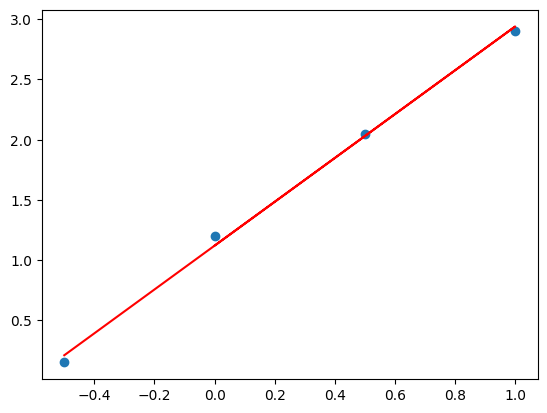

In [29]:
xs = np.array([0, 0.5, 1, -0.5])
ys = np.array([1.2, 2.05, 2.9, 0.15])
plt.scatter(xs, ys)
A = np.ones((4,2))
A[:,1] = xs
A
w, sse, _, _ = la.lstsq(A, ys)
# ?la.lstsq
plt.plot(xs, w[0] + w[1]*xs, color='red')

In [30]:
np.sin(xs)

array([ 0.        ,  0.47942554,  0.84147098, -0.47942554])

Odrediti vrednosti koeficijenata 𝑎 i 𝑏 tako da funkcija 𝑓(𝑥)=𝑎+𝑏sin𝑥 u smislu metode najmanjih kvadrata aproksimira skup tacaka (2,2.6), (−1.22,−1.7), (8.32,2.5) i (4.23,−1.6) u ravni. Dati ocenu greske. Prikazati skup tačaka i nacrtati rezultujucu funkciju

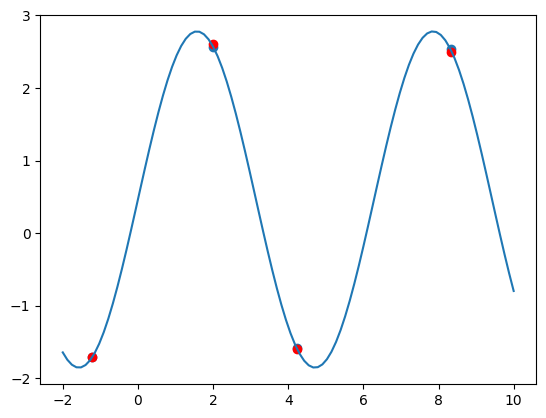

In [31]:
A = np.ones((4,2))
x = np.array([2, -1.22, 8.32, 4.23])
y = np.array([2.6, -1.7, 2.5, -1.6])
A[:,1] = np.sin(x)
w, error, _, _ = la.lstsq(A, y)
plt.scatter(x, w[0] + w[1] * np.sin(x))
plt.scatter(x, y, c='red')
xs = np.linspace(-2, 10, 100)
plt.plot(xs, w[0] + w[1] * np.sin(xs))

Svaki red u fajlu advertising.csv sadrži informacije o cenama u hiljadama dolara reklamnih usluga na određenom tržištu. Prva kolona se odnosi na cene reklamiranja na televiziji, druga na radiju, a treća u novinama. Četvrta kolona se odnosi na ukupnu prodaju proizvoda koji su se reklamirali na datim medijima. Kreirati linearni model koji predviđa prodaju na osnovu cena reklamiranja.

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [34]:
import pandas as pd

In [35]:
df = pd.read_csv('../2023_2024/live/01_linear_regression/advertising.csv')

In [37]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [39]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [48]:
X.to_numpy().shape

(200, 3)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
model.intercept_

np.float64(14.100000000000001)

In [52]:
model.coef_

array([3.76419618, 2.79230665, 0.05597551])

In [53]:
X_train.mean(axis=0)

array([-2.94209102e-16, -2.08166817e-16,  1.66533454e-17])

In [54]:
X_train.std(axis=0)

array([1., 1., 1.])

In [55]:
X_test.mean(axis=0), X_test.std(axis=0)

(array([-0.17686934,  0.13157335,  0.15004712]),
 array([1.07375743, 1.01025156, 1.31282242]))

In [56]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

3.174097353976106

In [57]:
y_train_pred = model.predict(X_train)
mean_squared_error(y_train, y_train_pred)

2.705129423081414

In [58]:
r2_score(y_test, y_pred)

0.8994380241009119

In [59]:
mean_absolute_error(y_test, y_pred)

1.4607567168117606